<a href="https://colab.research.google.com/github/CesarAF10/Simulaci-n-I/blob/main/Metodo_de_las_12_uniformes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== Resultados ===
Media teórica: 5.0000 | Media empírica: 5.0031
Desviación teórica: 2.0000 | Desviación empírica: 1.9967


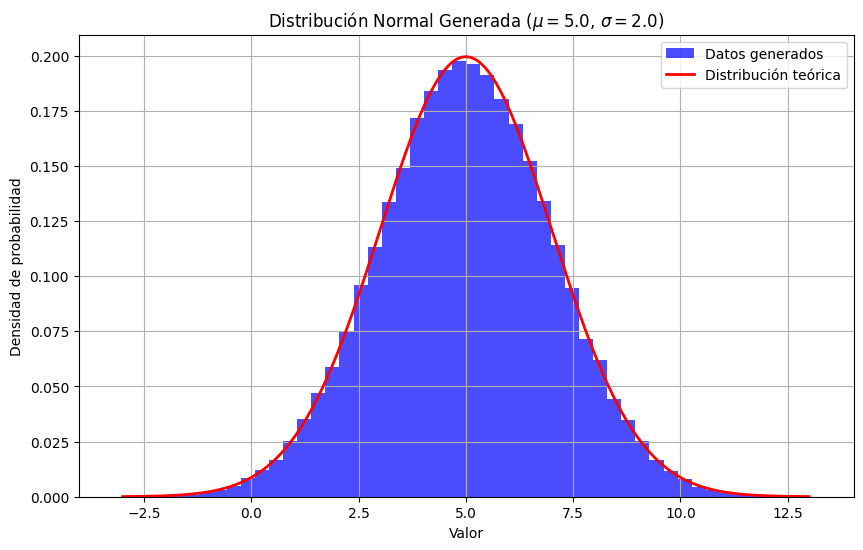

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# MÉTODO DE LAS 12 UNIFORMES PARA GENERAR UNA DISTRIBUCIÓN NORMAL
def Metodo_uniformes(mu=0, sigma=1, n_muestras=10000):
    """
    Parámetros:
        mu (float): Media deseada de la distribución normal.
        sigma (float): Desviación estándar deseada.
        n_muestras (int): Número de muestras a generar.
    """
    muestras = []
    for _ in range(n_muestras):
        # Suma de 12 variables uniformes U(0,1)
        suma_uniformes = sum(np.random.uniform(0, 1, 12))
        # Transformación a N(0,1) y luego a N(mu, sigma^2)
        z = suma_uniformes - 6  # Aproximación a N(0,1)
        x = mu + sigma * z
        muestras.append(x)
    return np.array(muestras)


# PARÁMETROS DE LA DISTRIBUCIÓN

mu = 5.0      # Media deseada
sigma = 2.0   # Desviación estándar deseada
n_muestras = 100000  # Número de muestras

# Generar datos
datos = Metodo_uniformes(mu, sigma, n_muestras)

# CÁLCULO DE ESTADÍSTICOS (EMPÍRICOS vs TEÓRICOS)

media_empirica = np.mean(datos)
std_empirica = np.std(datos)

print("=== Resultados ===")
print(f"Media teórica: {mu:.4f} | Media empírica: {media_empirica:.4f}")
print(f"Desviación teórica: {sigma:.4f} | Desviación empírica: {std_empirica:.4f}")

# VISUALIZACIÓN (HISTOGRAMA vs CURVA TEÓRICA)
plt.figure(figsize=(10, 6))
plt.hist(datos, bins=50, density=True, alpha=0.7, color='blue', label='Datos generados')

# Curva teórica
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)
plt.plot(x, y, 'r-', linewidth=2, label='Distribución teórica')

plt.title(f'Distribución Normal Generada ($\mu={mu}$, $\sigma={sigma}$)')
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.legend()
plt.grid(True)
plt.show()